### Title: DataDive in Python  .ipynb File  
## Author: Anuradha Tarafder  
## Date: 28th October 2024  

### Data Description  

This dataset contains information on a telecommunication company's customers, including their demographic details, account information, services availed, and billing details. It is primarily used to predict customer churn, which indicates whether a customer has discontinued their subscription to the company's services. The dataset includes 7,043 customer records with 21 variables.
The objective of using this dataset is to analyze and predict customer churn based on factors like contract type, monthly charges, tenure, and the services customers subscribe to. Understanding churn patterns can help develop strategies for improving customer retention.


>- **Dataset:** Telco Customer Churn Prediction  
>- **Dataset File:** WA_Fn-UseC_-Telco-Customer-Churn.csv  
>- **Data Source:** The dataset is publicly available and can be accessed on Kaggle --
   https://www.kaggle.com/datasets/blastchar/telco-customer-churn

### Variables  
| **Variable Name**      | **Data Type** | **Description**                                                         |
|------------------------|---------------|-------------------------------------------------------------------------|
| customerID             | String        | Unique identifier for each customer                                     |
| gender                 | String        | Gender of the customer (Male/Female)                                    |
| SeniorCitizen          | Integer       | Indicates if the customer is a senior citizen (0: No, 1: Yes)           |
| Partner                | String        | Whether the customer has a partner (Yes/No)                             |
| Dependents             | String        | Whether the customer has dependents (Yes/No)                            |
| tenure                 | Integer       | Number of months the customer has been with the company                 |
| PhoneService           | String        | Whether the customer has phone service (Yes/No)                         |
| MultipleLines          | String        | If the customer has multiple lines (Yes/No/No phone service)            |
| InternetService        | String        | Type of internet service (DSL/Fiber optic/No)                           |
| OnlineSecurity         | String        | Whether the customer has online security (Yes/No/No internet service)   |
| OnlineBackup           | String        | Whether the customer has online backup (Yes/No/No internet service)     |
| DeviceProtection       | String        | Whether the customer has device protection (Yes/No/No internet service) |
| TechSupport            | String        | Whether the customer has tech support (Yes/No/No internet service)      |
| StreamingTV            | String        | Whether the customer streams TV (Yes/No/No internet service)            |
| StreamingMovies        | String        | Whether the customer streams movies (Yes/No/No internet service)        |
| Contract               | String        | Type of contract (Month-to-month, One year, Two year)                   |
| PaperlessBilling       | String        | If the customer uses paperless billing (Yes/No)                         |
| PaymentMethod          | String        | Method of payment (e.g., Electronic check, Mailed check)                |
| MonthlyCharges         | Numeric       | The amount charged to the customer monthly                              |
| TotalCharges           | Numeric       | Total amount charged to the customer                                    |
| Churn                  | String        | Indicates if the customer has churned (Yes/No)                          |


## Loading required packages  


In [15]:
## Import the pandas library and giving it an alias pd
## Import the numpy library and giving it an alias np
## Import the plot library and giving it an alias plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the data

In [16]:
##  Reads the CSV file WA_Fn-UseC_-Telco-Customer-Churn.csv from the main directory 
##  and stores the data in a DataFrame named telco

telco = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [17]:
##  Displays a concise summary of the telco DataFrame, 
##  including the index, column names, non-null counts, 
##  and data types for each column
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [18]:
##  Displays the 1st 10 observations of telco DataFrame
telco.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## Data Preparation

In [19]:
##  Creates a copy of the original dataframe (telco) for further use and modifications
##  and name the created one as dat.
df = telco.copy()

**There was no modifications done to the dataset in R. However, as per rubric for Python, modifying by renaming 
the column name "InternetService" to "InternetOption"**

In [20]:
## Renaming the column "InternetService" to "InternetOption" and verifying the renamed column by using print 
df.rename(columns={'InternetService': 'InternetOption'}, inplace=True)
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetOption',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


## Data Moves  

**The data move operation is divided into four parts**
>- Grouping  
>- Filtering
>- Summarizing
>- Calculating

**The five variables that are used for data moves operation**
**Categorical**
>- gender
>- InternetOption (renamed from InternetService)
>- churn

**Numerical**
>- tenure
>- MonthlyCharges

### Grouping --  

 - **Goal:** 
   The goal of using grouping is to explore the average MonthlyCharges for customers, based on two factors:
   1. InternetOption - the type of internet service a customer has (e.g., DSL, Fiber optic, or None).
   2. gender - whether the customer is Male or Female.
   
   This information helps in:
   1. Identifying which customer groups (based on internet option and gender) tend to pay more on average.
   2. Spotting potential trends, such as whether one internet option type (e.g., Fiber optic) generally incurs higher charges than others, or if     there is a difference in charges based on gender.



In [21]:
## Grouping data by InternetOption and gender, then calculating the average MonthlyCharges
grouped_data = df.groupby(['InternetOption', 'gender']).MonthlyCharges.mean().reset_index()
print("\nGrouped data by InternetOption and gender with average MonthlyCharges:")
print(grouped_data)



Grouped data by InternetOption and gender with average MonthlyCharges:
  InternetOption  gender  MonthlyCharges
0            DSL  Female       58.590741
1            DSL    Male       57.631427
2    Fiber optic  Female       91.472569
3    Fiber optic    Male       91.527868
4             No  Female       21.110710
5             No    Male       21.048973


### Analysis of the grouping
The result suggests --

1. **Fiber Optic Users**:
   - **Higher Monthly Charges**: Both male and female customers with Fiber optic internet have the highest average monthly charges, around $91.5.
   - **Gender Comparison**: There is a negligible difference in the charges between male and female Fiber optic users, indicating similar pricing across genders for this service type.

2. **DSL Users**:
   - **Moderate Monthly Charges**: For DSL users, the average monthly charge is notably lower than for Fiber optic users, around $57.6 for males and $58.6 for females.
   - **Slight Gender Variation**: Female DSL users have a marginally higher average charge than male users, although the difference is small.

3. **No Internet Service**:
   - **Lowest Monthly Charges**: Customers without internet service pay the lowest monthly charges, around $21, for both genders.
   - **Minimal Gender Difference**: As with the other categories, there’s almost no difference in monthly charges between males and females without internet service.

### Insights:
- **Pricing Structure by Service Type**: Fiber optic customers pay significantly more on average than those with DSL or no internet service, which reflects the premium nature of Fiber optic service.
- **Negligible Gender Influence on Charges**: Gender does not appear to be a significant factor in monthly charges, as differences are minimal within each service type.
- **Potential Target Segments**: If Telco wants to increase revenue, they might consider focusing on upselling Fiber optic services to DSL customers, as there is a substantial price difference between these two service types.

### Filtering --

- **Goal:**  
  The goal of using filter is to identify high-paying customers who use Fiber optic internet. Specifically, the code aims to find customers who are   subscribed to Fiber optic service and have MonthlyCharges greater than $100.
  
- **The code filters the dataset to:**  
  1. Focus on Fiber optic customers, as they tend to have higher monthly charges compared to other internet service types.
  2. Identify high-spending customers within this group, specifically those who are paying more than $100 per month.


In [22]:
## Focuses on high-paying customers using Fiber optic internet
filtered_data = df[(df['InternetOption'] == "Fiber optic") & (df['MonthlyCharges'] > 100)]
print("\nFiltered data for Fiber optic users with MonthlyCharges > 100:")
print(filtered_data.head(10))


Filtered data for Fiber optic users with MonthlyCharges > 100:
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
8   7892-POOKP  Female              0     Yes         No      28          Yes   
12  8091-TTVAX    Male              0     Yes         No      58          Yes   
13  0280-XJGEX    Male              0      No         No      49          Yes   
14  5129-JLPIS    Male              0      No         No      25          Yes   
15  3655-SNQYZ  Female              0     Yes        Yes      69          Yes   
17  9959-WOFKT    Male              0      No        Yes      71          Yes   
38  5380-WJKOV    Male              0      No         No      34          Yes   
57  5067-XJQFU    Male              1     Yes        Yes      66          Yes   
59  5954-BDFSG  Female              0      No         No      72          Yes   
60  0434-CSFON  Female              0     Yes         No      47          Yes   

   MultipleLines InternetOption OnlineSecuri

### Analysis of filtering 

### Key Observations
1. **High Monthly Spending**:
   - All customers in this filtered dataset have monthly charges exceeding $100, placing them in a high-spending segment. These charges suggest that Fiber optic users may be paying a premium for their internet service, especially when bundled with additional features.

2. **Churn Patterns**:
   - Some of these high-paying Fiber optic users have churned, as indicated by `Churn = Yes`. This churn among high-value customers could be a concern, as these customers contribute more revenue on average. Retention efforts for this group may be valuable.

3. **Contract Type**:
   - A variety of contract types are represented (Month-to-month, One year, Two year), with many high-paying customers on month-to-month contracts. Month-to-month plans often correlate with higher churn rates since customers have more flexibility to leave.

4. **Payment Method**:
   - The dataset shows a mix of payment methods among high-paying customers, with **Electronic check** appearing frequently. 

5. **Additional Services**:
   - These high-paying customers also seem to subscribe to other services such as **StreamingTV** and **StreamingMovies**, as well as **DeviceProtection** and **TechSupport** in some cases. These add-ons likely contribute to the higher MonthlyCharges.

6. **Demographics**:
   - This subset includes both male and female customers, and most of them are not senior citizens (`SeniorCitizen = 0`), although there is at least one senior citizen in the group. This suggests that the high-paying segment is not limited to a specific demographic but is more related to the services they choose.

### Insights and Potential Actions
- **Retention Focus on High-Value Customers**: High-value customers on month-to-month contracts are more likely to churn. Targeted retention strategies, such as incentives to switch to longer contracts, could reduce churn.
- **Evaluate Payment Method Correlation with Churn**: Since Electronic check payments appear frequently and are often associated with higher churn rates, further analysis is needed to reveal whether offering incentives for other payment methods might improve retention.
- **Customer Segmentation for Upsell Opportunities**: Customers already paying over $100 monthly for Fiber optic and additional services may be open to further premium offerings, such as faster speeds or exclusive content.

In short, this filtered data offers insights into key customer group, which can thereby help Telco understand and potentially capitalize on its high-revenue customers.

### Summarize --  

- **Goal:** 
   The goal of using summarize is to explore customer tenure (the number of months a customer has been with the company) based on their churn status.
   Specifically, it aims to find the average and median tenure for customers who have churned and those who have not.
   
- **The code groups customers by their churn status (Churn) and calculates:**  
  **1.Average Tenure (avg_tenure):** The mean number of months customers have stayed with the company, which provides an overall view of 
    customer retention within each group.  
  **2.Median Tenure (median_tenure):** The middle value of tenure within each group, which helps in understanding the typical duration customers 
    stay before they churn or stay.  
    
- By calculating both average and median, this summary gives a balanced perspective on how long customers typically remain with the company, 
  with and without outlier influence.

In [23]:
## Summarizing average and median tenure based on churn status
summary_data = df.groupby('Churn').agg(avg_tenure=('tenure', 'mean'),
                                       median_tenure=('tenure', 'median')).reset_index()
print("\nSummary of average and median tenure by Churn status:")
print(summary_data)


Summary of average and median tenure by Churn status:
  Churn  avg_tenure  median_tenure
0    No   37.569965           38.0
1   Yes   17.979133           10.0


### Analysis of the Summarize
The summary of average and median tenure by churn status provides insights into the retention patterns of the customer base:

1. **Non-Churning Customers (`Churn = No`)**:
   - **Average Tenure**: Approximately 37.57 months, indicating that customers who stay with the company tend to have a long-term relationship, averaging over three years.
   - **Median Tenure**: 38 months, which is close to the average. This consistency suggests a steady and prolonged tenure for most non-churning customers, with fewer outliers impacting the average.

2. **Churning Customers (`Churn = Yes`)**:
   - **Average Tenure**: Approximately 17.98 months, which is significantly shorter than non-churning customers. This lower average tenure implies that customers who churn typically leave the company much sooner.
   - **Median Tenure**: 10 months, which is notably lower than the average, indicating that a large portion of churners leave within the first year. The difference between the median and average tenure for churning customers also suggests some customers stay longer before churning, but the majority leave early.

### Key Takeaways
- **Early Churn Risk**: Many customers who churn do so within the first year (as indicated by the median tenure of 10 months).
- **Stable Retention Among Loyal Customers**: Customers who do not churn tend to stay for a longer period, with a consistent tenure around 38 months.

### Implications for Customer Retention Strategies
- **Focus on Early Retention**: Since a significant portion of churn happens within the first year, efforts could be directed toward enhancing customer satisfaction and engagement during the initial months to prevent early churn.
- **Loyalty Incentives for Long-Term Customers**: With a substantial difference in tenure between churning and non-churning customers, loyalty programs targeting customers around their one-year mark could help extend their engagement and reduce churn risk. 

This analysis thus provides actionable insights to enhance customer retention by focusing on early intervention for at-risk customers and fostering loyalty among longer-tenured customers.

### Calculating

- **Goal:** 
   The goal is to convert the tenure of customers (originally measured in months) into years by creating a new variable, tenure_years. This helps in making the data more interpretable, especially for understanding customer retention in terms of years rather than months.
   
- **The code:**  
  1. Creates a new column called tenure_years by dividing each value in the tenure column by 12, which converts the tenure from months to years.
  2. Prints the first 10 rows with customerID, tenure (in months), and tenure_years (in years) to give a quick view of how long each customer has been with the company in years.

This calculation provides a straightforward way to interpret the customer tenure in a more familiar unit (years), which is often more intuitive for strategic analysis, such as comparing customer segments based on long-term retention.

In [24]:
##  Creates a new variable 'tenure_years' converting tenure from months to years and then rounding off
df['tenure_years'] = round(df['tenure'] / 12)
print("\nTenure in years for a sample of customers:")
print(df[['customerID', 'tenure', 'tenure_years']].head(10))


Tenure in years for a sample of customers:
   customerID  tenure  tenure_years
0  7590-VHVEG       1           0.0
1  5575-GNVDE      34           3.0
2  3668-QPYBK       2           0.0
3  7795-CFOCW      45           4.0
4  9237-HQITU       2           0.0
5  9305-CDSKC       8           1.0
6  1452-KIOVK      22           2.0
7  6713-OKOMC      10           1.0
8  7892-POOKP      28           2.0
9  6388-TABGU      62           5.0


## Analysis of Calculating 

### Insights from tenure_years
>- Retention Patterns:  
Customers with tenure_years closer to zero may have a higher risk of churn, as shorter tenure is often associated with higher churn rates.
Multi-year customers, especially those with tenure_years of 3.0 or more, likely represent a loyal segment. Their presence suggests successful long-term retention strategies for some portion of the customer base.

>- Potential for Targeted Retention:  
Recognizing tenure in years allows for segmenting customers into meaningful categories, such as short-term (< 1 year), mid-term (1-3 years), and long-term (> 3 years). This segmentation could help in designing targeted retention strategies for each group, focusing on new customers with shorter tenure to improve retention rates.

This conversion provides an accessible way to interpret customer tenure and supports more effective analysis of customer retention based on time.

## Data Visualization 

The distribution of customer tenure is visualized to understand how long customers typically stay with the company. 
Two histograms are plotted for months and years respectively for this purpose.

>- Histogram of Tenure in Months:  
   Shows the distribution of tenure in months, giving a more granular view of how many customers fall into specific tenure periods (e.g., short-term,    mid-term, and long-term).

>- Histogram of Tenure in Years:
   Plots tenure_years (the tenure converted to years) to provide an easy-to-interpret overview of tenure distribution in multi-year terms.


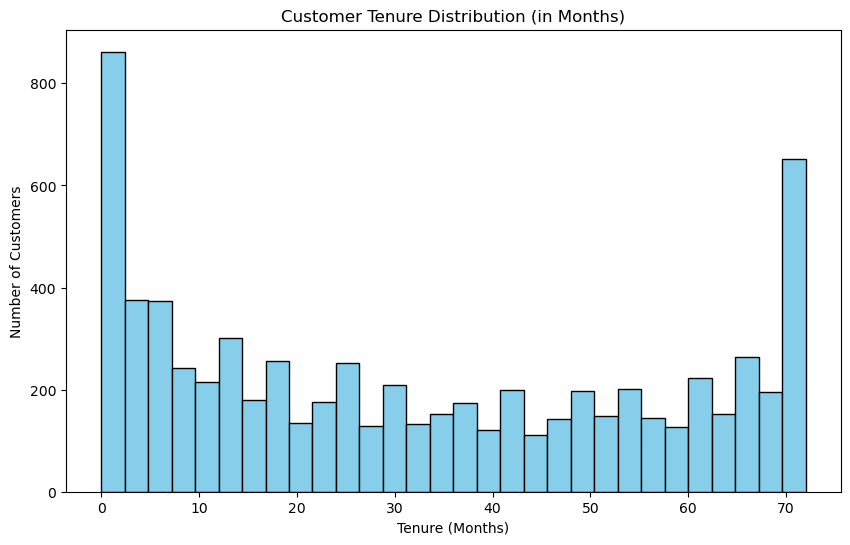

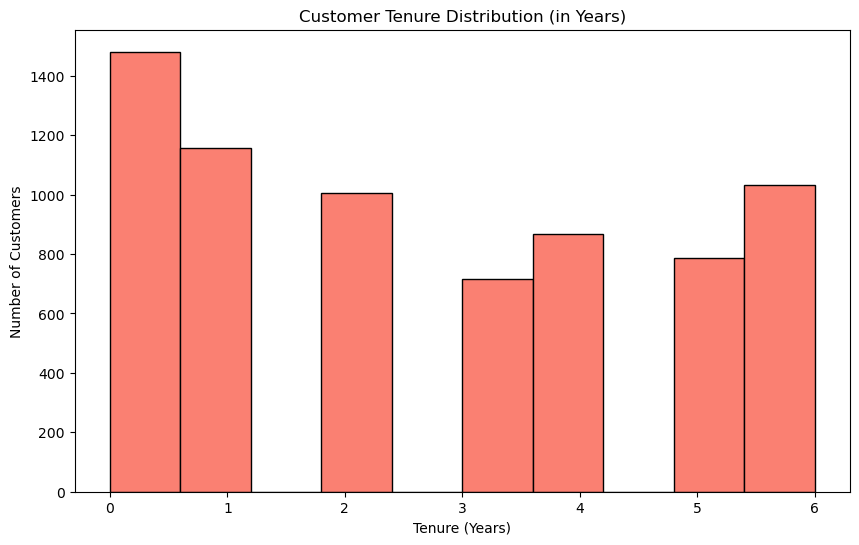

In [25]:
## Histogram of Tenure in Months
plt.figure(figsize=(10, 6))
plt.hist(df['tenure'], bins=30, color='skyblue', edgecolor='black')
plt.title('Customer Tenure Distribution (in Months)')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.show()

## Histogram of Tenure in Years
plt.figure(figsize=(10, 6))
plt.hist(df['tenure_years'], bins=10, color='salmon', edgecolor='black')
plt.title('Customer Tenure Distribution (in Years)')
plt.xlabel('Tenure (Years)')
plt.ylabel('Number of Customers')
plt.show()
